<a href="https://colab.research.google.com/github/WittmannF/course/blob/master/day-4/assignment-4-imagenette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Use Best Practices to Improve Image Classification Results

[Imagenette](https://github.com/fastai/imagenette) is a subset of 10 classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).

The image sizes are Full size; 320 px; 160 px. The '320 px' and '160 px' versions have their shortest size resized to that size, with their aspect ratio maintained.

It was created by Jeremy Howard with the purpose of having a small vision dataset for validating algorithm ideas and that could be replicated in bigger datasets. 

## 1. Get dataset
Likewise in the previous project, let's first mount your Google Drive (if using colab) and download the dataset if it is the first time you are running this cell (if the dataset folder was not found):

### 1.1 Mount Google Drive (if using Colab)
Mount Google Drive for avoiding having to download the dataset again next time you are running this notebook.

In [11]:
import sys, os

MOUNT_GDRIVE = True
USING_COLAB = 'google.colab' in sys.modules

# Update here with the folder of the files of your course
COURSE_DIRECTORY = '/content/drive/My Drive/course/day-4'

if MOUNT_GDRIVE and USING_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Create course directory if it doesn't exist (if not cloned from github)
    if not os.path.exists(COURSE_DIRECTORY):
        os.makedirs(COURSE_DIRECTORY)
    # Open course directory
    os.chdir(COURSE_DIRECTORY)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### 1.2 Download Dataset
Now, let's download the dataset if it is the first time you are running this cell (i.e., if the dataset folder was not found): 

In [12]:
import os
from keras.utils import get_file

DATA_PATH = 'imagenette-160/'
DATA_URL = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz'
TAR_FILENAME = 'imagenette-160.tgz'

if not os.path.exists(DATA_PATH):# If dataset folder doesn't exist
    get_file(TAR_FILENAME, DATA_URL, cache_dir='.', cache_subdir='', extract=True)

    print(f'Removing file {TAR_FILENAME}')
    os.remove(TAR_FILENAME)
else:
    print(f'Dataset folder {DATA_PATH} has been found')

Dataset folder imagenette-160/ has been found


In [0]:
TRAIN_PATH = f'{DATA_PATH}train/'
VALID_PATH = f'{DATA_PATH}val/'

In [16]:
ls {TRAIN_PATH}

ls: cannot access 'imagenette-160/train/': No such file or directory


## 2. Visualize Images from the Dataset
Now, let's visualize some of the images available in the training folder. First let's load a list with all filepaths:

In [0]:
import glob

filepaths = glob.glob(TRAIN_PATH+'**/*.JPEG', recursive=True)

Now, let's visualize a random image from the dataset. Every time you run the next cell, a random image (either of a dog or a cat) is going to be displayed:

Using TensorFlow backend.


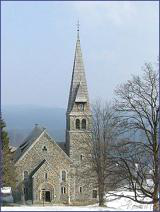

In [0]:
from keras.preprocessing.image import load_img
import random

load_img(random.choice(filepaths))

## 2. Create Training and Validation Generators


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50, preprocess_input

TARGET_SIZE=(160,160,3)
BATCH_SIZE=64

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_loader = datagen.flow_from_directory(TRAIN_PATH, target_size=TARGET_SIZE[:2], class_mode='sparse', batch_size=BATCH_SIZE)
valid_loader = datagen.flow_from_directory(VALID_PATH, target_size=TARGET_SIZE[:2], class_mode='sparse', batch_size=BATCH_SIZE)


Found 12894 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


## 3. Create Model from Scratch (without Transfer Learning)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=TARGET_SIZE),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])


W0723 21:16:58.434132 140150835222400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 21:16:58.458049 140150835222400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 21:16:58.464318 140150835222400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 21:16:58.484571 140150835222400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
# 6. Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

W0723 21:16:58.535070 140150835222400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 21:16:58.567430 140150835222400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.fit_generator(train_loader, 
                    train_loader.n//train_loader.batch_size, 
                    epochs=3,
                    validation_data=valid_loader, 
                    validation_steps=valid_loader.n//valid_loader.batch_size)

W0723 21:16:58.689568 140150835222400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0723 21:16:58.735709 140150835222400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/3
201/201 [==============================] - 47s 235ms/step - loss: 14.4521 - acc: 0.1033 - val_loss: 14.6070 - val_acc: 0.0938
Epoch 2/3
118/201 [================>.............] - ETA: 18s - loss: 14.4787 - acc: 0.1017

KeyboardInterrupt: ignored

## 4. Improve Model Using Best Practices

### Simple NN

In [0]:
# Learning Rate Finder
!git clone https://github.com/WittmannF/LRFinder
from LRFinder.keras_callback import LRFinder

fatal: destination path 'LRFinder' already exists and is not an empty directory.


In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=TARGET_SIZE),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# 6. Train the model
model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

In [0]:
lr_finder = LRFinder(1e-8, 1e-2)

model.fit_generator(train_loader, 
                    train_loader.n//train_loader.batch_size,
                    validation_data=valid_loader, 
                    validation_steps=valid_loader.n//valid_loader.batch_size,
                    callbacks=[lr_finder])

In [0]:
# 6. Train the model
model.compile(optimizer=Adam(lr=1e-6), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit_generator(train_loader, 
                    train_loader.n//train_loader.batch_size, 
                    epochs=3,
                    validation_data=valid_loader, 
                    validation_steps=valid_loader.n//valid_loader.batch_size)

In [0]:
model.fit_generator(train_loader, train_loader.n//train_loader.batch_size, epochs=10,
                        validation_data=valid_loader, validation_steps=valid_loader.n//valid_loader.batch_size)

In [0]:
lr_finder = LRFinder(1e-10, 1e-2)

model.fit_generator(train_loader, 
                    train_loader.n//train_loader.batch_size,
                    validation_data=valid_loader, 
                    validation_steps=valid_loader.n//valid_loader.batch_size,
                    callbacks=[lr_finder])

In [0]:
# 6. Train the model
model.compile(optimizer=Adam(lr=1e-7), 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

model.fit_generator(train_loader, train_loader.n//train_loader.batch_size, epochs=20,
                        validation_data=valid_loader, validation_steps=valid_loader.n//valid_loader.batch_size)

### ResNet Architecture (without pretrained weights)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam

# 2. Initialize base model
base_model = ResNet50(weights=None, include_top=False, input_shape=TARGET_SIZE)

# 3. Freeze layers from the base model
for layer in base_model.layers:
    layer.trainable=True

# 4. Add Fully connected layer
model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dense(10, activation='softmax')])

In [0]:
model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

lr_finder = LRFinder(1e-6, 1)

model.fit_generator(train_loader, 
                    train_loader.n//train_loader.batch_size,
                    validation_data=valid_loader, 
                    validation_steps=valid_loader.n//valid_loader.batch_size,
                    callbacks=[lr_finder])

In [0]:
# 6. Train the model
model.compile(optimizer=Adam(lr=2e-3), 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

model.fit_generator(train_loader, train_loader.n//train_loader.batch_size, epochs=20,
                        validation_data=valid_loader, validation_steps=valid_loader.n//valid_loader.batch_size)

### More Conv Layers

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.optimizers import Adam

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=TARGET_SIZE),
    BatchNormalization(),
    MaxPooling2D(pool_size=(4, 4)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(4, 4)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(4, 4)),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    #BatchNormalization(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# 6. Train the model
model.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

In [0]:
lr_finder = LRFinder(1e-6, 1)

model.fit_generator(train_loader, 
                    train_loader.n//train_loader.batch_size,
                    validation_data=valid_loader, 
                    validation_steps=valid_loader.n//valid_loader.batch_size,
                    callbacks=[lr_finder])

NameError: ignored

In [0]:
# 6. Train the model
model.compile(optimizer=Adam(lr=1e-3), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model.fit_generator(train_loader, 
                    train_loader.n//train_loader.batch_size,
                    epochs=40,
                    validation_data=valid_loader, 
                    validation_steps=valid_loader.n//valid_loader.batch_size)

Epoch 1/40
 18/201 [=>............................] - ETA: 52:46 - loss: 2.4987 - acc: 0.2622

KeyboardInterrupt: ignored

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 160, 160, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 160, 160, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
__________

### VGG16 like Architecture

## 5. Improve using best practices (using transfer learning)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50, preprocess_input

TARGET_SIZE=(160,160,3)
BATCH_SIZE=64

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_loader = datagen.flow_from_directory(TRAIN_PATH, target_size=TARGET_SIZE[:2], class_mode='sparse', batch_size=BATCH_SIZE)
valid_loader = datagen.flow_from_directory(VALID_PATH, target_size=TARGET_SIZE[:2], class_mode='sparse', batch_size=BATCH_SIZE)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

# 2. Initialize base model
base_model = ResNet50(include_top=False, input_shape=TARGET_SIZE)

# 3. Freeze layers from the base model
for layer in base_model.layers:
    layer.trainable=False

# 4. Add Fully connected layer

class_indices = train_loader.class_indices

index_to_class = {v: k for k, v in class_indices.items()}

number_of_classes = len(class_indices)

model = Sequential([base_model,
                    Flatten(),
                    Dense(number_of_classes, activation='softmax')])

In [0]:
# 6. Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])